<a href="https://colab.research.google.com/github/beyzaxx/DSA210/blob/main/AirQuality_WaterPollution_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 1. Library Imports and Data Loading

In this step, we import the Python libraries that we will use for the analysis and load the
pollution dataset into a pandas DataFrame. The dataset comes from the file
`DSA210-Data_Pollution.xlsx` and contains country-level observations on air quality and
water pollution.

After loading the data, we also clean the column names by removing extra spaces and
special characters. This preprocessing step ensures that the variables can be accessed
consistently in the following cells and prevents errors caused by inconsistent headers.



In [32]:
sns.set(style="whitegrid", context="talk")


excel = pd.ExcelFile("/content/DSA210 Data_Pollution.xlsx")
data = pd.read_excel(excel, excel.sheet_names[0])
data.columns = data.columns.str.replace('\xa0', '', regex=False).str.strip()

print("Kolon isimleri:", data.columns.tolist())


def fix_broken_numeric(series):

    cleaned = series.astype(str).str.replace(r"[^\d]", "", regex=True)
    cleaned = pd.to_numeric(cleaned, errors='coerce')

    cleaned = np.where(cleaned > 500, cleaned / 1e8, cleaned)
    return cleaned

data['AirQuality'] = fix_broken_numeric(data['AirQuality'])
data['WaterPollution'] = fix_broken_numeric(data['WaterPollution'])

data_cleaned = data[
    (data['AirQuality'].between(0, 100)) &
    (data['WaterPollution'].between(0, 100))
].dropna(subset=['AirQuality', 'WaterPollution'])

print("\nCleaned AirQuality summary istatistic:")
print(data_cleaned['AirQuality'].describe())
print("\nCleaned WaterPollution summary istatistic:")
print(data_cleaned['WaterPollution'].describe())

Kolon isimleri: ['Country', 'AirQuality', 'WaterPollution']

Cleaned AirQuality summary istatistic:
count    3614.000000
mean       52.812744
std        36.923472
min         0.000000
25%        19.356691
50%        57.142857
75%        85.000000
max       100.000000
Name: AirQuality, dtype: float64

Cleaned WaterPollution summary istatistic:
count    3614.000000
mean       41.123242
std        28.191866
min         0.000000
25%        25.000000
50%        50.000000
75%        53.571429
max       100.000000
Name: WaterPollution, dtype: float64


## 4. Aggregation of Median Pollution Levels by Country

In this step, the dataset is grouped by *Country* in order to compute the **median Air Quality**
and **median Water Pollution** values for each country. Using the median instead of the mean
helps reduce the influence of extreme or potentially noisy observations in the raw dataset.

This aggregated dataset represents a cleaner and more stable summary of environmental
conditions at the country level. After computing the medians, descriptive statistics are
generated to provide an overview of the distribution of air and water pollution scores
across all countries.

These summary statistics include the number of countries in the dataset, and the minimum,
maximum, mean, and quartile values of each pollution indicator.


In [31]:
agg = (
    data_cleaned
    .groupby("Country")[["AirQuality", "WaterPollution"]]
    .median()
    .reset_index()
)

print("\nCountry-median descriptive istatistics:\n", agg.describe())


Country-median descriptive istatistics:
        AirQuality  WaterPollution
count  173.000000      173.000000
mean    46.541797       49.507051
std     27.007984       24.182931
min      0.000000        0.000000
25%     25.000000       33.333333
50%     50.000000       50.000000
75%     70.833333       65.000000
max    100.000000      100.000000


## 5. Pearson Correlation Analysis

To examine the linear relationship between air quality and water pollution at the
country level, a Pearson correlation coefficient was calculated. This statistical
measure quantifies both the **strength** and the **direction** of a linear association
between the two variables.

The resulting correlation value is approximately **r = −0.36**, indicating a
**moderate negative relationship**. This means that, in general, countries with
higher air quality scores tend to have lower levels of water pollution. The associated
p-value is extremely small (p < 0.001), showing that this relationship is
**statistically significant** and unlikely to be due to random chance.

Overall, the Pearson correlation provides initial evidence that air and water pollution
may be linked and potentially influenced by similar environmental or policy-driven
factors.


In [30]:
pearson_corr, pearson_p = stats.pearsonr(agg["AirQuality"], agg["WaterPollution"])
print("\nPearson korelasyon katsayısı:", pearson_corr)
print("p-değeri:", pearson_p)


Pearson korelasyon katsayısı: -0.3561105539874498
p-değeri: 1.5204525681342964e-06


## 6. Correlation Heatmap

The heatmap below visualizes the correlation matrix between the median Air Quality and
median Water Pollution values computed at the country level. The diagonal shows a
correlation of 1.0, as each variable is perfectly correlated with itself.

The off-diagonal values indicate the correlation between the two pollution indicators.
Consistent with the Pearson coefficient, the heatmap shows a **moderate negative
relationship (r ≈ −0.36)** between air quality and water pollution. This suggests that
countries with **better air quality** tend to have **lower water pollution**, while those with
worse air quality tend to exhibit higher water contamination levels.

The color scale ranging from −1 to +1 provides an intuitive visual interpretation of the
relationship’s direction and strength, with blue tones indicating negative correlation and
red tones indicating positive correlation.



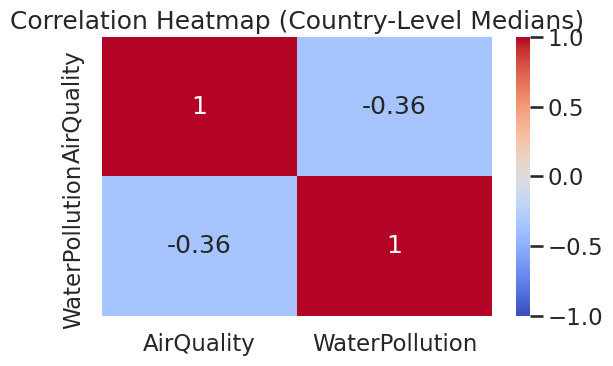

In [27]:
plt.figure(figsize=(6, 4))
corr_matrix = agg[["AirQuality", "WaterPollution"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Country-Level Medians)")
plt.tight_layout()
plt.show()

## 7. Scatter Plot of Air Quality vs. Water Pollution

The scatter plot below visualizes the relationship between median Air Quality and median
Water Pollution at the country level. Each point represents a country, plotted according
to its median air quality score (x-axis) and median water pollution score (y-axis).

The overall pattern of the points suggests a **negative relationship** between the two
pollution indicators: countries with **higher air quality values** generally tend to have
**lower levels of water pollution**, and vice versa. This visual trend is consistent with the
Pearson correlation coefficient (r ≈ −0.36), reinforcing the presence of a moderate
negative linear association.

Although the spread of points shows some variability—indicating that air and water
pollution are not perfectly aligned—the downward pattern across the plot suggests that
these environmental factors may share common sources or may be influenced by similar
policy or industrial conditions.



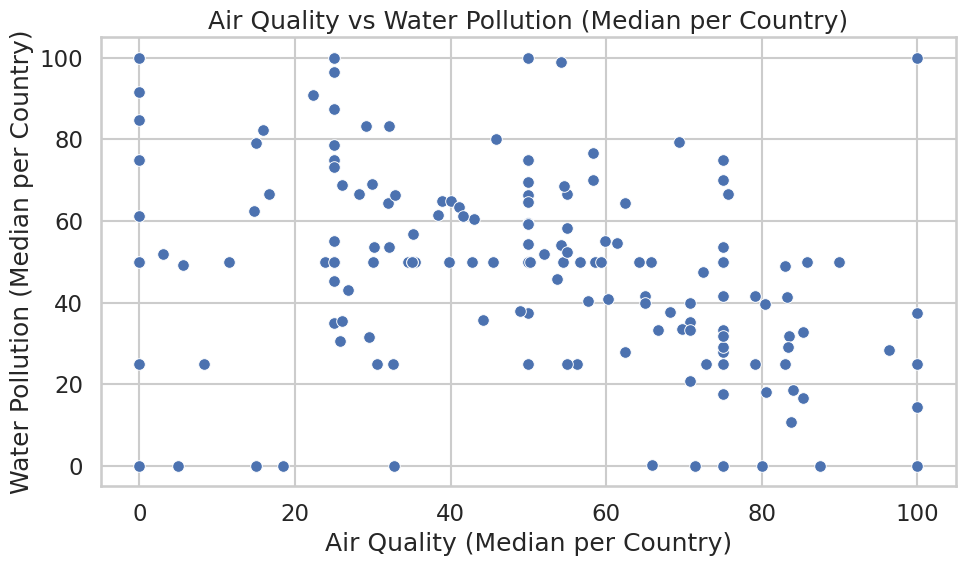

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="AirQuality", y="WaterPollution", data=agg, s=70)
plt.title("Air Quality vs Water Pollution (Median per Country)")
plt.xlabel("Air Quality (Median per Country)")
plt.ylabel("Water Pollution (Median per Country)")
plt.tight_layout()
plt.show()

## 8. OLS Regression Analysis

To further examine the relationship between air quality and water pollution, an Ordinary
Least Squares (OLS) regression model was fitted, where **Water Pollution** is the dependent
variable and **Air Quality** is the independent variable.

The regression results show:

- **Coefficient (β₁) = −0.3189**  
  This negative coefficient indicates that an increase in air quality is associated with a
  decrease in water pollution. In practical terms, for every 1-unit increase in the air quality
  score, water pollution decreases by approximately 0.32 units on average.

- **p-value < 0.001**  
  This means the slope is statistically significant, confirming that the relationship between
  air and water pollution is unlikely to be due to random variation.

- **R² ≈ 0.13**  
  The model explains about 13% of the variation in water pollution. Although not a very
  high value, this is expected in environmental data, where many external factors influence
  pollution levels. It still shows a meaningful linear effect.

The regression plot visually supports the statistical results: the trend line slopes downward,
demonstrating the negative linear relationship between air quality and water pollution.
Even though the data points show some dispersion, the overall direction is clearly negative,
consistent with both the Pearson correlation and the regression output.



OLS Regression Summary:
                             OLS Regression Results                            
Dep. Variable:         WaterPollution   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.52e-06
Time:                        22:25:54   Log-Likelihood:                -784.36
No. Observations:                 173   AIC:                             1573.
Df Residuals:                     171   BIC:                             1579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.3474     

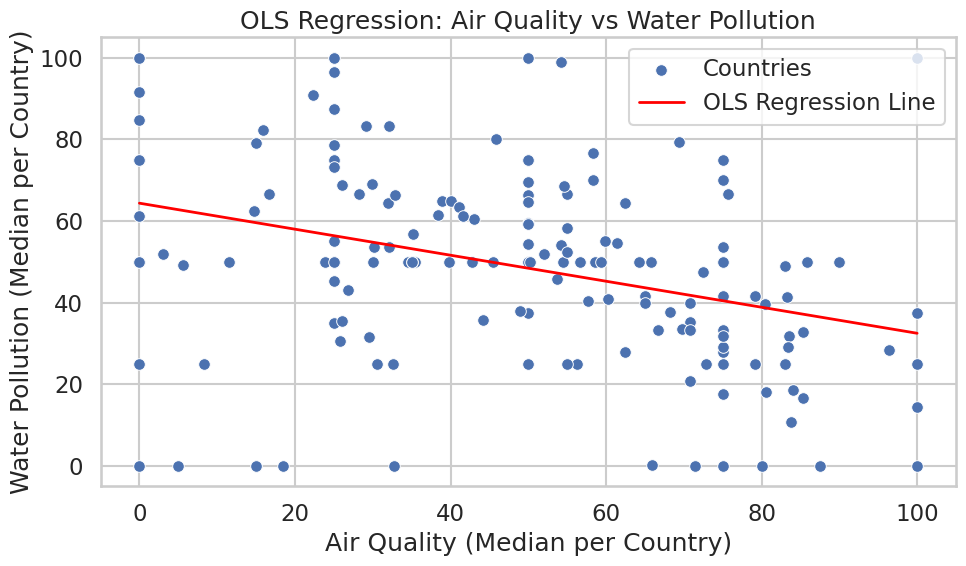

In [28]:
X = agg["AirQuality"]
y = agg["WaterPollution"]
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print("\nOLS Regression Summary:\n", ols_model.summary())

plt.figure(figsize=(10, 6))
sns.scatterplot(x="AirQuality", y="WaterPollution", data=agg, s=70, label="Countries")
x_vals = np.linspace(agg["AirQuality"].min(), agg["AirQuality"].max(), 100)
X_line = sm.add_constant(x_vals)
y_pred = ols_model.predict(X_line)
plt.plot(x_vals, y_pred, color="red", linewidth=2, label="OLS Regression Line")
plt.title("OLS Regression: Air Quality vs Water Pollution")
plt.xlabel("Air Quality (Median per Country)")
plt.ylabel("Water Pollution (Median per Country)")
plt.legend()
plt.tight_layout()
plt.show()